# Information Retrieval and Web Analytics

## Scraping Twitter Data

In this lab exercise we'll work with Twitter data. For that you will need to use your Twitter Developer account (or create a new one):

We'll do the following steps:

1. Get the API bearer token for authenticating the API connections.

2. Learn about the main functions of Twitter API, the typical json structure and the use of Tweepy library for Python.

3. Make queries with different parameters.

4. Download the user timeline, only the last 3200 tweets.

5. Work with the Twitter Streaming API.

6. Analyze the received JSON data, and display it.


We will not post results to any external website, neither share the data with third parties.


In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from collections import Counter
# from config import *

# 1. Getting the API Keys and Tokens

Connecting to Twitter API requires to have API keys and tokens. We can get those with a **Twitter Developer Account** by doing the following steps:

**1st step** Login into the Twitter Developer Portal with you personal account: [https://developer.twitter.com/en/portal](https://developer.twitter.com/en/portal)

**2nd step** Create a Developer Account

If this is your first time in the Twitter Developer you will need to Apply for the creation and approval. Select Student as the use case, and choose no regarding the use of the content for a government entity. Then accept the Terms & Conditions.

![Figure 1](https://drive.google.com/uc?export=view&id=1bs4kmVEG-sWJMR4R5QjQHSIplxKJYQSw)
<center><caption> <u>Figure 1</u>: Creating a developer account</caption></center>

**3rd step** Now we **Create an app**.

Name the application as "IR_class_Your_name"

![Figure 2](https://drive.google.com/uc?export=view&id=145FvO5K-aWg0Ad624g53Oojjieivmuqk)
<center><caption> <u>Figure 2</u>: Creating an app</caption></center>

**4th step** API Credentials (Keys and Tokens)

The application we created will have credentials that will allow us to connect to the Twitter API.

**API Key**: is like the application username.
**API Secret**: is like the application password.
**Access Token**: your user access token.
**Access Token Secret**: your user secret.

These prior keys and tikes are often used to access to the API V1. 

**Bearer Token**: This will give you access to Twitter API V2, which is the one available for the new accounts created. This is the token we are mostly going to use for this session.

Store them in a safe place. We'll also use them below for the exercise.

![Figure 3](https://drive.google.com/uc?export=view&id=1HROwx6FBovt1PzTOuBlzlq6Mfn_aSDvg)
<center><caption> <u>Figure 3</u>: Getting the keys and tokens to access the API</caption></center>



In [32]:
## Save Tweeter App credentials in variables:
api_key = "YOUR CODE HERE"
api_secret ="YOUR CODE HERE"

access_token = "YOUR CODE HERE"
access_token_secret ="YOUR CODE HERE"

bearer="YOUR CODE HERE"

In [33]:
# Download Tweepy into current environment.
import sys
# or use below one for pip install...
!pip3 install tweepy --upgrade

#Import the necessary methods from tweepy library
import tweepy
import json
import datetime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
# authenticate with our app credentials:
client = tweepy.Client(bearer_token=bearer)

# 2. Introduction to main functions of Twitter API + Tweepy

**What is Twitter**

Twitter is an online social network, which allows users to post short messages/status, 280-character each tweets. Because of the continuous flood of tweets generated every day, Twitter is a great source to get rapid and current information through the web. It can be particularly useful to understand how people interacts with respect to a specific (current) topic, how they discuss and create conversations (e.g. threads) or just to keep yourself posted about what's happening around the world.

**Why Twitter for scraping data**

In the last years, with the limitations imposed by law restrictions, accessing social media data through scraping is becoming a challenging task. Nevertheless, Twitter remains (with Reddit) one of the few that is still accessible and relatively open to do research studies and analyze aggregated social network data.

**Main functionalities of the Twitter API**

Through the Twitter API, any developer can access Twitter data in several ways. It's possible to retrieve users timeline (the last 3200 tweets posted by a single user), it's possible to collect conversation around a topic, up to 7 days before and, as main functionality, it's possible to track the live stream of information related to a specific topic (which can be easily tracked through hashtags).


**Python library Tweepy**

Tweepy is a popular Python library that helps us to play with the Twitter API.

**Some practical examples of studies performed using Twitter Data**

Here are some studies performed analyzing Twitter Data:
- [Quantifying Controversy in Social Media](https://arxiv.org/abs/1507.05224)
- [Falling into the Echo Chamber: The Italian Vaccination Debate on Twitter](https://ojs.aaai.org//index.php/ICWSM/article/view/7285)


# 3. Downloading a user timeline
Returns a collection of the most recent Tweets posted by the user indicated by the `user_id` parameters.


Reference: [https://developer.twitter.com/en/docs/twitter-api/tweets/timelines/introduction](https://developer.twitter.com/en/docs/twitter-api/tweets/timelines/introduction)

Tweet object data: [https://developer.twitter.com/en/docs/twitter-api/data-dictionary/object-model/tweet](https://developer.twitter.com/en/docs/twitter-api/data-dictionary/object-model/tweet)

In [35]:
user_name = 'netflix'
user_id=client.get_user(username=user_name).data.id #first we get the user id using the username as argument
tweets = client.get_users_tweets(id=user_id, tweet_fields=['id','text','created_at','public_metrics']) #then we choose the elements we want to retrieve for a given tweet
for tweet in tweets.data: #display tweets collected
    print(tweet.id, tweet.created_at, tweet.text,  tweet.public_metrics,"\n\n")    

1584697919378448384 2022-10-25 00:06:40+00:00 RT @strongblacklead: if our love isn't like lino &amp; amy's, ion want it @rickeythompson 😭

who's finished #FromScratch ?? https://t.co/z9MYdZ… {'retweet_count': 35, 'reply_count': 0, 'like_count': 0, 'quote_count': 0} 


1584686883216363520 2022-10-24 23:22:49+00:00 Only watch From Scratch if you’re ready to cryyyyy…like eyes red, boogers everywhere kinda cry. {'retweet_count': 141, 'reply_count': 94, 'like_count': 1549, 'quote_count': 80} 


1584673590473007106 2022-10-24 22:30:00+00:00 What do a sci-fi, rom com, and travel show have in common? Hotties tryna save the world. 

They're all right here at https://t.co/Sq3VQXhhWm https://t.co/1ST8QhSuXB {'retweet_count': 30, 'reply_count': 20, 'like_count': 491, 'quote_count': 1} 


1584666040549736448 2022-10-24 22:00:00+00:00 Pay no attention to the ghost child in your bedroom. Guillermo del Toro's Cabinet of Curiosities -- a 4-night Halloween event -- begins tomorrow, only on Netflix. http

In [36]:
print("Number of tweets for " + user_name + ": ", len(tweets.data))

Number of tweets for netflix:  10


In [37]:
print("Printing second tweet (position 1): ")
print(tweets.data[1])

print("Printing first tweet RT Status (position 1): ")

print(tweets.data[1].public_metrics)

print("Retweet Count (position 1):",tweets.data[1].public_metrics['retweet_count'])

Printing second tweet (position 1): 
Only watch From Scratch if you’re ready to cryyyyy…like eyes red, boogers everywhere kinda cry.
Printing first tweet RT Status (position 1): 
{'retweet_count': 141, 'reply_count': 94, 'like_count': 1549, 'quote_count': 80}
Retweet Count (position 1): 141


**So we get only the last 200? What about all the other tweets?**

With the Standard Twitter API we can get up to the last 3200 tweets. If we want more, we have to get premium account, which is quite expensive. In our case we don't really need it, because we mainly work with streaming data, which produces good amount of data in relative short amount of time.

**But... How do we get the 3200 tweets for one user?** 

It's possible to retrieve the last tweets of all the public users (private ones we can't). In the following example we will go through the last 3200 tweets of NASA Hubble Space Telescope (@NASAHubble).


Reference: http://docs.tweepy.org/en/latest/cursor_tutorial.html

1st Approach - Using Paginator 

In [38]:
user_name = 'NASAHubble'
user_id=client.get_user(username=user_name).data.id #first we get the user id using the username as argument
tweets = tweepy.Paginator(client.get_users_tweets,id=user_id, tweet_fields=['id','text','created_at','public_metrics'],
                              max_results=100).flatten(limit=3300) #then we define a paginator which will go through each page of results, we give it the function we are calling (get_users_tweets), and its arguments as we did without the paginator (id, tweet_fiels, and amount of tweets to collect per page)

#we have to store data as they are brought by the paginator
tweets_dic={} #to keep the data
for count, tweet in enumerate(tweets):
    tweet_num=count+1
    print(tweet_num, tweet.id, tweet.text,tweet.created_at,tweet.public_metrics,"\n")   
    tweets_dic[tweet_num]={}
    tweets_dic[tweet_num]["id"]=tweet.text 
    tweets_dic[tweet_num]["text"]=tweet.text 
    tweets_dic[tweet_num]["created_at"]=tweet.created_at 
    tweets_dic[tweet_num]["public_metrics"]=tweet.public_metrics 


print("Number of tweets for " + user_name + ": ", tweet_num)



Streaming output truncated to the last 5000 lines.
1012 1321179035523641345 @NASAWebb @NASA So excited! 😍 2020-10-27 19:56:43+00:00 {'retweet_count': 8, 'reply_count': 0, 'like_count': 60, 'quote_count': 0} 

1013 1321174919879688192 RT @NASAUniverse: The universe has bats in the attic! 🦇
@NASAHubble spotted the shadow of a giant cosmic bat. Disks of gas and dust surroun… 2020-10-27 19:40:21+00:00 {'retweet_count': 140, 'reply_count': 0, 'like_count': 0, 'quote_count': 0} 

1014 1321138100962209792 For 30 years, Hubble has been our front-row seat to the universe. Soon, @NASAWebb will join us as they peer out into the cosmos.
 
Learn more about Webb and how it will build on Hubble's history in @NASA's Curious Universe podcast.
 
🎧 Listen &amp; subscribe: https://t.co/qREcbwdTG9 https://t.co/r2yG9ZUYyo 2020-10-27 17:14:03+00:00 {'retweet_count': 77, 'reply_count': 5, 'like_count': 547, 'quote_count': 5} 

1015 1321090114144141315 This #HubbleClassic features a cluster of stars called Hod

In [39]:
print("Printing second tweet (position 2): ")
print(tweets_dic[2])

Printing second tweet (position 2): 
{'id': 'These two cosmic objects bring double trouble for #HubbleFriday!\n \nThe pair of glowing clumps are Herbig-Haro objects 1,250 light-years away. They were created when jets of gas from newborn stars collided with surrounding gas and dust at breakneck speed: https://t.co/eMao0d7DXY https://t.co/AaRq3QYxh5', 'text': 'These two cosmic objects bring double trouble for #HubbleFriday!\n \nThe pair of glowing clumps are Herbig-Haro objects 1,250 light-years away. They were created when jets of gas from newborn stars collided with surrounding gas and dust at breakneck speed: https://t.co/eMao0d7DXY https://t.co/AaRq3QYxh5', 'created_at': datetime.datetime(2022, 10, 21, 14, 6, 58, tzinfo=datetime.timezone.utc), 'public_metrics': {'retweet_count': 461, 'reply_count': 53, 'like_count': 3310, 'quote_count': 20}}


https://developer.twitter.com/en/docs/twitter-api/data-dictionary/object-model/tweet


Fields:
https://developer.twitter.com/en/docs/twitter-api/fields


In [40]:
print("Printing first tweet number of retweets received (position 1): ")
print(tweets_dic[1]["public_metrics"]['retweet_count'])

Printing first tweet number of retweets received (position 1): 
230


Print the text of the tweet with more likes

In [41]:
more_likes = 0
text_with_more_likes = ""
for tweet in tweets_dic:
    likes_tweet = tweets_dic[tweet]['public_metrics']['like_count']     #get the like counts in the structure
    if likes_tweet > more_likes: #apply the algorithm to get the max value in a list
        more_likes = likes_tweet
        text_with_more_likes = tweets_dic[tweet]["text"]
        
              
print("Most liked tweet: {} \n with a total of {} likes.".format(text_with_more_likes,more_likes))        


Most liked tweet: Neptune in a new light! 🔵

Hubble’s view of this planet looks pretty different from @NASAWebb's new image, on the right.

That’s because these two telescopes looked at the planet in different wavelengths of light. ⬇️ https://t.co/omelj0ZkDX 
 with a total of 29299 likes.


Print the text of the tweet with more retweets

In [42]:
more_retweets = 0
text_with_more_retweets = ""
for tweet in tweets_dic:    
    num_retweets =  tweets_dic[tweet]['public_metrics']['retweet_count'] #get the public metrics in the structure
    if num_retweets > more_retweets:
        more_retweets = num_retweets
        text_with_more_retweets = tweets_dic[tweet]["text"]
print("Most retweeted tweet: {} \n with a total of {} retweets.".format(text_with_more_retweets,more_retweets))


Most retweeted tweet: RT @NASA: RIP Leonard Nimoy. So many of us at NASA were inspired by Star Trek. Boldly go... http://t.co/qpeH5BTzQc http://t.co/nMmFMKYv1L 
 with a total of 30191 retweets.


# 4 - Working with the Streaming API
  
The Twitter API allows you to "listen" to the public stream of Tweets, collecting its data and filtering them by topic. To do so, we need to set a "Stream Listener", through Tweepy, in order to set some parameters like how many tweets to collect, how to store them, how to handle errors, etc.

We are going to collect the tweets and save them to a file in JSON format.

Tweepy reference for streaming: https://docs.tweepy.org/en/stable/streamingclient.html#tweepy.StreamingClient

In [43]:

import time
from progressbar import ProgressBar, Percentage, Bar
class MyStream(tweepy.StreamingClient):
    # This function gets called when the stream is working
     def __init__(self, bearer_tok, output_filename,  stop_condition=10):
        """
        initialize the stream, with num. of tweets and saving the output file
        """  
         
        super(MyStream, self).__init__(bearer_tok)
        # to-count the number of tweets collected
        self.num_tweets = 0

        #the token to access the API
        self.bearer =bearer

        # save filename
        self.filename = output_filename

        # stop-condition
        self.stop_condition = stop_condition       
                
        self.file = open(self.filename, "a+") #Open file to store tweets as we stream

        self.pbar = ProgressBar(widgets=[Percentage(), Bar()], maxval=self.stop_condition).start() #start a progress bar
        print("\n")

     def on_connect(self): #what we do once the connection is estabished
        print("Connected")

     def on_tweet(self, tweet): #what we do as each tweet is retrieved      
       self.num_tweets += 1  #update amount of tweets collected
       # Check stop condition
       if self.num_tweets <= self.stop_condition:
            self.file.write(json.dumps(tweet.data) + '\n') #store tweet
            print('\nNew Tweet {0}: {1}'.format(self.num_tweets, tweet.text[0:80]))            
            self.pbar.update(self.num_tweets) #update progress
            time.sleep(0.2) #just for visualization when printing        
          
       else: #stop streaming
          self.pbar.finish()
          print("Tweets persisted in file " + self.filename)
          self.file.close()
          # sys.exit(0) # not for Notebook, use only in local
          self.disconnect() 
       
         
     def on_error(self, status):
            """
            function useful to handle errors. It's possible to personalize it
            depending on the way we want to handle errors
            """
            return False
            print(status)
        


We are going to stream tweets addressing a particular topic by giving our streamer a set of keywords to search. We can also search hashtags (#) and users (@).

Here we download a bunch of tweets with a set of keywords related to covid ```["covid", "vaccines", "pandemy"]```

Change value of variable `stop_cond` to `1000` and wait several minutes until completion.

**This will take a while!** Check the progress bar...

In [44]:
%%time
output_filename = "one.json"
#os.remove(output_filename) # restart with a fresh file
stop_cond = 10 # test with 1000, takes a longer time

stream = MyStream(bearer,output_filename,stop_cond) #initializing instance

search_terms=["covid","vaccines","pandemy"] #defne list of search terms

for term in search_terms:
  stream.add_rules(tweepy.StreamRule(term)) #adding the rules for the streamer

stream.filter(expansions="author_id", tweet_fields=["public_metrics","created_at","author_id","entities","referenced_tweets"]) #runs the stream. With the expanssions we ask for information that does nit come by default in a tweet object. We can also ask for the tweet fields we want to retrieve.

N/A%|                                                                         |



Connected


 10%|#######                                                                  |


New Tweet 1: RT @LutteOuvriere: Le PDG de #Total se plaint de la polémique sur son  salaire: 


 20%|##############                                                           |


New Tweet 2: RT @DashDobrofsky: Republicans want schools to teach “both sides” of the Holocau


 30%|#####################                                                    |


New Tweet 3: RT @Awakend_Citizen: 「Covid-19」という社会変革・大虐殺イベントを企画・実行した連中が人類の敵であり極悪人であることは疑いようのない


 40%|#############################                                            |


New Tweet 4: @leJDD @JeromeBegle S’il n’y avait que les membres du gouvernement n’est ce pas 


 50%|####################################                                     |


New Tweet 5: RT @livewithnoregrt: what if covid never happened, what would life be like rn?


 60%|###########################################                              |


New Tweet 6: @soyla_pam Shuuu ...ánimo


 70%|###################################################                      |


New Tweet 7: RT @EChabriere: En France, on force la vaccination covid qui est très médiocre.



 80%|##########################################################               |


New Tweet 8: Tendré COVID otra vez?!


 90%|#################################################################        |


New Tweet 9: RT @ogeday0066: Covid var diye dışarı çıkardığıniz mahkumlardan daha mi suçluyuz


100%|#########################################################################|


New Tweet 10: @UnaTelaBianca L’ho pensato anche io 🙂🙂


100%|#########################################################################|
ERROR:tweepy.streaming:Stream connection closed by Twitter


Tweets persisted in file one.json
CPU times: user 214 ms, sys: 17.2 ms, total: 231 ms
Wall time: 6.42 s


In [45]:
#stream.delete_rules(['1584846606779777024','1584846611171115008','1584846615084425217'])

In [46]:
#stream.get_rules()

# 5. Let's analyze the json data

**A. Statistical description of data**
    
- how many tweets have been retweeted?
- how many unique users?
- how many tweets have not been retweeted?
- most frequent hashtags

**B. Wordcloud**
- wordcloud of hashtags
- generate ```bag_of_words``` from tweets
- wordcloud of text

**C. Retweet graph**

- build network of retweet
- find nodes with highest in-degree
- compute other nodes' centralities

## A. Data structure

In [47]:
#load data
with open("one.json", "rb") as f: 
    data = f.readlines()
    data = [json.loads(str_) for str_ in data]
    data=pd.json_normalize(data) #to get as many nested information as possible into a single column in the dataframe


In [48]:
#liad data in a dataframe
tweets_data = pd.DataFrame.from_records(data)

In [49]:
tweets_data.columns

Index(['author_id', 'created_at', 'edit_history_tweet_ids', 'id',
       'referenced_tweets', 'text', 'entities.mentions',
       'public_metrics.retweet_count', 'public_metrics.reply_count',
       'public_metrics.like_count', 'public_metrics.quote_count',
       'entities.annotations', 'entities.urls', 'entities.hashtags'],
      dtype='object')

In [50]:
len(tweets_data.text.unique()) #check amount of uniqe tweets

20

In [51]:

def print_retweets_unique_tweets_unique_users(tweets):
    retweets_ = tweets["public_metrics.retweet_count"].apply(lambda x: 0 if x == 0 else 1) # to get the amount of tweets that have been retweeted. List of o/1 for retweet or not
    tot_retweets = sum(retweets_)
    unique_tweets = len(retweets_) - tot_retweets # amiunt of tweets that have not been retweeted   
    tot_users = tweets.author_id.nunique()  #get number of unique users ids   
   
    
    print("tweets retweeted: {}".format(tot_retweets))
    print("tweets not retweeted: {}".format(unique_tweets))
    print("Unique Users: {}".format(tot_users))

In [52]:
print_retweets_unique_tweets_unique_users(tweets_data)

tweets retweeted: 11
tweets not retweeted: 9
Unique Users: 20


In [53]:
tweets_data.columns

Index(['author_id', 'created_at', 'edit_history_tweet_ids', 'id',
       'referenced_tweets', 'text', 'entities.mentions',
       'public_metrics.retweet_count', 'public_metrics.reply_count',
       'public_metrics.like_count', 'public_metrics.quote_count',
       'entities.annotations', 'entities.urls', 'entities.hashtags'],
      dtype='object')

In [54]:
import itertools

#get text of the hashtags which are in the structure defined as "tag"
def getTagsLists(lstTags):
    listH=[]
    for tg in lstTags:
      listH.append(tg["tag"].lower())
    return listH

def extract_hashtags():
    hashtags_lists = tweets_data["entities.hashtags"].dropna() #get rid of tweets that have ni hashtags
    hashtags = hashtags_lists.apply(lambda x: getTagsLists(x)) # get hashtags terms used (the text of a hashtag)
    hashtags = list(itertools.chain(*hashtags)) #make a list of hashtags
    hashtags_by_frequency = Counter(hashtags) #count the hashtags
    hashtags_by_frequency = {k: hashtags_by_frequency[k] for k in hashtags_by_frequency if k != None} 
    
    return hashtags_by_frequency

In [55]:
hashtags_by_frequency = extract_hashtags() 
hashtags_by_frequency

{'total': 1, 'ehliyetaffı': 1}

Let's plot the top-10 frequent hashtags now

In [56]:
df_hashtags = pd.DataFrame(hashtags_by_frequency.items())
df_hashtags.columns = ["hashtag", "count"]
df_hashtags.set_index("hashtag", inplace=True)
df_hashtags.sort_values("count", inplace=True, ascending=False) #order

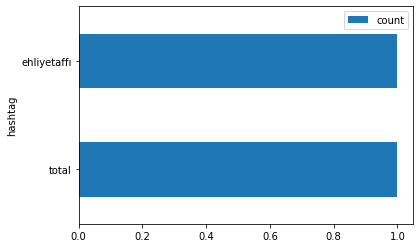

In [57]:
df_hashtags.head(10).plot.barh()
plt.show()

Let's try now to generate a wordcloud given the tweets we have collected.

# B. Wordcloud

In [58]:
from wordcloud import WordCloud, ImageColorGenerator
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [59]:
bag_of_words = {}
for text in tweets_data["text"]:
    
    # remove "RT" string indicating a retweet
    text = text.replace("RT ", "").strip()
    
    # lowering text
    text = text.lower()
    
    # removing all the punctuations
    text = re.sub(r'[^\w\s]','',text).strip()
    
    # tokenize the text
    lst_text = text.split()
    
    # remove stopwords
    lst_text = [x for x in lst_text if x not in STOPWORDS]
    
    # create bag-of-words - for each word the frequency of the word in the corpus
    for w in lst_text:
        if w not in bag_of_words:
            bag_of_words[w] = 0
        bag_of_words[w] +=1

In [60]:
def plot_wordcloud(title, dic_):
    fig, ax = plt.subplots(1, 1, figsize=(18,7))
    wordcloud = WordCloud(background_color="white",width=1600, height=800)
    wordcloud = wordcloud.generate_from_frequencies(dic_)
    ax.axis("off")     
    ax.imshow(wordcloud, interpolation='bilinear')

    ax.set_title(title)
    plt.tight_layout()
    fig.subplots_adjust(top=0.8)
    plt.show()

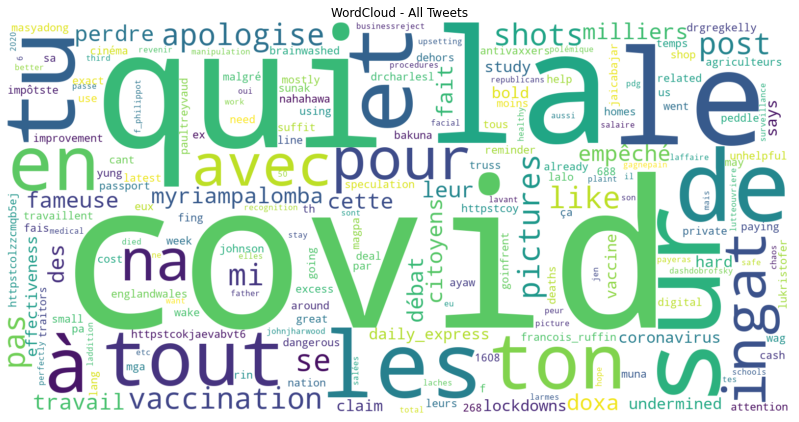

In [61]:
plot_wordcloud("WordCloud - All Tweets", bag_of_words)

## C. Retweet graph

In [62]:
#first we get all the collected tweets that are retweets, they are identified by an "RT" in the text
df_retweets = tweets_data[tweets_data["text"].apply(lambda x: x[:2]) == "RT"]
df_retweets 

,author_id,created_at,edit_history_tweet_ids,id,referenced_tweets,text,entities.mentions,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,entities.annotations,entities.urls,entities.hashtags
0,493440990,2022-10-25T10:26:44.000Z,[1584853964205731840],1584853964205731840,"[{'type': 'retweeted', 'id': '1584849274348916...",RT @myriampalomba: Cette fameuse doxa qui a em...,"[{'start': 3, 'end': 17, 'username': 'myriampa...",46,0,0,0,NaN,NaN,NaN
1,1494356606888337418,2022-10-25T10:26:44.000Z,[1584853961986965504],1584853961986965504,"[{'type': 'retweeted', 'id': '1584853022013902...",RT @Daily_Express: Bold coronavirus study clai...,"[{'start': 3, 'end': 17, 'username': 'Daily_Ex...",3,0,0,0,"[{'start': 24, 'end': 34, 'probability': 0.916...","[{'start': 101, 'end': 124, 'url': 'https://t....",NaN
2,1240469648996433923,2022-10-25T10:26:44.000Z,[1584853963517534209],1584853963517534209,"[{'type': 'retweeted', 'id': '1584826085027766...","RT @DrCharlesL: 1,608 excess deaths in England...","[{'start': 3, 'end': 14, 'username': 'DrCharle...",203,0,0,0,NaN,NaN,NaN
5,71585236,2022-10-25T10:26:44.000Z,[1584853964285059072],1584853964285059072,"[{'type': 'retweeted', 'id': '1584703742351355...",RT @lukristofer: @drgregkelly This is unhelpfu...,"[{'start': 3, 'end': 15, 'username': 'lukristo...",6,0,0,0,NaN,NaN,NaN
6,1101437818792898561,2022-10-25T10:26:44.000Z,[1584853963962486784],1584853963962486784,"[{'type': 'retweeted', 'id': '1584848284912209...",RT @jaicabajar: Reminder lang na may nahahawa ...,"[{'start': 3, 'end': 14, 'username': 'jaicabaj...",46,0,0,0,NaN,NaN,NaN
10,849348895650009089,2022-10-25T10:30:43.000Z,[1584854963234054146],1584854963234054146,"[{'type': 'retweeted', 'id': '1584851533149126...",RT @LutteOuvriere: Le PDG de #Total se plaint ...,"[{'start': 3, 'end': 17, 'username': 'LutteOuv...",3,0,0,0,NaN,NaN,"[{'start': 29, 'end': 35, 'tag': 'Total'}]"
11,612759839,2022-10-25T10:30:43.000Z,[1584854964048121856],1584854964048121856,"[{'type': 'retweeted', 'id': '1584754996838830...",RT @DashDobrofsky: Republicans want schools to...,"[{'start': 3, 'end': 17, 'username': 'DashDobr...",378,0,0,0,"[{'start': 73, 'end': 81, 'probability': 0.875...",NaN,NaN
12,76921708,2022-10-25T10:30:43.000Z,[1584854965134143489],1584854965134143489,"[{'type': 'retweeted', 'id': '1584563135914323...",RT @Awakend_Citizen: 「Covid-19」という社会変革・大虐殺イベント...,"[{'start': 3, 'end': 19, 'username': 'Awakend_...",89,0,0,0,"[{'start': 22, 'end': 29, 'probability': 0.416...",NaN,NaN
14,1348981690669162501,2022-10-25T10:30:41.000Z,[1584854956129284096],1584854956129284096,"[{'type': 'retweeted', 'id': '1584740856275533...",RT @livewithnoregrt: what if covid never happe...,"[{'start': 3, 'end': 19, 'username': 'livewith...",2102,0,0,0,"[{'start': 29, 'end': 33, 'probability': 0.976...",NaN,NaN
16,1455789552963100672,2022-10-25T10:30:43.000Z,[1584854966304317440],1584854966304317440,"[{'type': 'retweeted', 'id': '1584850688395587...","RT @EChabriere: En France, on force la vaccina...","[{'start': 3, 'end': 14, 'username': 'EChabrie...",20,0,0,0,NaN,NaN,NaN


In [63]:
def getRetweetedUser(tweet):
    return tweet.split(":")[0].split(" ")[1].split("@")[1]

In [64]:
#then we define that the nodes of our grap correspond to users, and a source node (retweeter) - destination node (original tweet author) pair is defined
df_graph = pd.DataFrame(columns=["source", "destination"])

# add source-nodes (author_ids if retweeters)
df_graph["source"] = df_retweets['author_id']

# add destination-nodes (author ids of original authors)
df_graph["destination"] = df_retweets["text"].apply(lambda x: client.get_user(username=getRetweetedUser(x)).data.id)

In [65]:
df_graph.head()

,source,destination
0,493440990,256214703
1,1494356606888337418,17895820
2,1240469648996433923,1601011657
5,71585236,289057005
6,1101437818792898561,88886265


In [66]:
df_graph.drop_duplicates()

,source,destination
0,493440990,256214703
1,1494356606888337418,17895820
2,1240469648996433923,1601011657
5,71585236,289057005
6,1101437818792898561,88886265
10,849348895650009089,311525465
11,612759839,1520612280643162112
12,76921708,1323290841398439937
14,1348981690669162501,1070750036382883840
16,1455789552963100672,1271445997152014336


We now analyze the retweet graph, given by user-user interactions. The graph G=(V,E) is generate, where V is the set of users and a generic edge (u,v) is created if user u retweeted a post of the user v.

We look at nodes properties, such in-degree, closeness centrality and pagerank.

A fast recap of the measures we're goin to use:

- **closeness centrality**: *it is a measure of centrality in a network, calculated as the reciprocal of the sum of the length of the shortest paths between the node and all other nodes in the graph. Thus, the more central a node is, the closer it is to all other nodes* ([link](https://en.wikipedia.org/wiki/Closeness_centrality)).

- **pagerank**: It defines a probability distribution over all the nodes in the graph. A score/probability assigned to each node indicates the importance of the single node, taking into account both local and global structure of the graph ([link](https://en.wikipedia.org/wiki/PageRank)).


**References to the networkx library:**

Graphs: https://networkx.org/documentation/stable/reference/classes/digraph.html

Page rank: https://networkx.org/documentation/stable/reference/algorithms/link_analysis.html#module-networkx.algorithms.link_analysis.pagerank_alg

Closeness: https://networkx.org/documentation/stable/reference/algorithms/centrality.html#closeness


In [67]:
import networkx as nx

In [68]:
G = nx.DiGraph()
G.add_edges_from(df_graph.values)
topk = 10

In [69]:
topk_indegree = sorted(G.in_degree(), key=lambda x: x[1], reverse=True)[:topk]

In [70]:
topk_indegree

[(256214703, 1),
 (17895820, 1),
 (1601011657, 1),
 (289057005, 1),
 (88886265, 1),
 (311525465, 1),
 (1520612280643162112, 1),
 (1323290841398439937, 1),
 (1070750036382883840, 1),
 (1271445997152014336, 1)]

In [71]:
topk_pagerank =  sorted(nx.pagerank(G).items(), key=lambda x: x[1], reverse=True)[:topk]

In [72]:
topk_pagerank

[(256214703, 0.05901136435607139),
 (17895820, 0.05901136435607139),
 (1601011657, 0.05901136435607139),
 (289057005, 0.05901136435607139),
 (88886265, 0.05901136435607139),
 (311525465, 0.05901136435607139),
 (1520612280643162112, 0.05901136435607139),
 (1323290841398439937, 0.05901136435607139),
 (1070750036382883840, 0.05901136435607139),
 (1271445997152014336, 0.05901136435607139)]

In [73]:
topk_closeness = sorted(nx.closeness_centrality(G).items(), key=lambda x: x[1], reverse=True)[:topk]

In [74]:
topk_closeness

[(256214703, 0.047619047619047616),
 (17895820, 0.047619047619047616),
 (1601011657, 0.047619047619047616),
 (289057005, 0.047619047619047616),
 (88886265, 0.047619047619047616),
 (311525465, 0.047619047619047616),
 (1520612280643162112, 0.047619047619047616),
 (1323290841398439937, 0.047619047619047616),
 (1070750036382883840, 0.047619047619047616),
 (1271445997152014336, 0.047619047619047616)]

2nd Approach - Collecting Twitter Data using Responses 

In [75]:
user_name = 'NASAHubble'
user_id=client.get_user(username=user_name).data.id #first we get the user id using the username as argument
tweets = client.get_users_tweets(id=user_id, tweet_fields=['id','text','created_at','public_metrics'],
                              max_results=100)

print("Printing second tweet (position 1): ")
print(tweets.data[1])

print("Printing first tweet RT Status (position 1): ")

print(tweets.data[1].public_metrics)

print("Retweet Count (position 1):",tweets.data[1].public_metrics['retweet_count'])


Printing second tweet (position 1): 
These two cosmic objects bring double trouble for #HubbleFriday!
 
The pair of glowing clumps are Herbig-Haro objects 1,250 light-years away. They were created when jets of gas from newborn stars collided with surrounding gas and dust at breakneck speed: https://t.co/eMao0d7DXY https://t.co/AaRq3QYxh5
Printing first tweet RT Status (position 1): 
{'retweet_count': 461, 'reply_count': 53, 'like_count': 3310, 'quote_count': 20}
Retweet Count (position 1): 461


In [76]:
user_name = 'Netflix'
user_id=client.get_user(username=user_name).data.id #first we get the user id using the username as argument
tweetsResponses = []
next_token = None

for i in range(33):
  if next_token == None:
    tweets = client.get_users_tweets(id=user_id, tweet_fields=['id','text','created_at','public_metrics'],
                                max_results=100)
  else:
    tweets = client.get_users_tweets(id=user_id, tweet_fields=['id','text','created_at','public_metrics'],
                                max_results=100,pagination_token=next_token)
  tweetsResponses.append(tweets)      
  metadata = tweets.meta
  next_token = metadata.get("next_token")
  print(next_token)
  if next_token == None:
     print("Limit Exceeded")
     break

#A collections.namedtuple, with data, includes, errors, and meta fields, corresponding with the fields in responses from Twitter’s API.
print(len(tweetsResponses))

7140dibdnow9c7btw423wwl189igfycgnbkcqrrpc5wl0
7140dibdnow9c7btw423i3snhh2ogjwgcj4m91gvwz3n6
7140dibdnow9c7btw423hxfyv1zgal3qrmznp6hfjqtyv
7140dibdnow9c7btw423ht5x2l70vzjuu7bi7b45939ys
7140dibdnow9c7btw423hr1so6oqzftu517lczeyb9ovq
7140dibdnow9c7btw423hms1dh02htxtjspcz69besisw
7140dibdnow9c7btw4232y7az7yyswvgcxay6tfxr6uya
7140dibdnow9c7btw4232tygljkakd3k9p8g8lmju96pl
7140dibdnow9c7btw4232pn7irhti9a0jisl01lr1m1x0
7140dibdnow9c7btw4232ldgh8ixuanpybajd7xoqht86
7140dibdnow9c7btw4232h4axffl0wok8dmgvedffb03c
7140dibdnow9c7btw422nqh8p8ldyq9j03c81jms4x6wk
7140dibdnow9c7btw422nk25oeypnjyt0snqmf8cd05ki
7140dibdnow9c7btw422ndp6opnsnzcqcwaxjy2h8ezas
7140dibdnow9c7btw4228p397rbba1g00nx0ubb3m729e
7140dibdnow9c7btw4228iqvc9eeu6c94qpefvrio78l3
7140dibdnow9c7btw4228eh4647yamp4sbjxi20vfvh2x
7140dibdnow9c7btw4228a5vch5qkrf7ozc77jfp1goq8
7140dibdnow9c7btw421tji7nznj4czev0bfzjn2ght14
7140dibdnow9c7btw421tf85pgdkpi096851z0a6hwdv7
7140dibdnow9c7btw421t8ukmq4klwbe5v65g4cdai0q8
7140dibdnow9c7btw421t4jmgwvbed516v

In [77]:
all_tweets = {"id":[],"text":[],"created_at":[],"public_metrics":[],"tweepy":[]}
for tResponses in tweetsResponses: #tweepy.client.Response
  #print(type(tResponses),tResponses.data)
  for tweet in tResponses.data: #tweepy.tweet.Tweet (id,text,created_at,public_metrics)
      #print(type(tweet))
      all_tweets["id"].append(tweet.id)
      all_tweets["text"].append(tweet.text)
      all_tweets["created_at"].append(tweet.created_at)
      all_tweets["public_metrics"].append(tweet.public_metrics)

In [78]:
len(all_tweets["id"])

3230